In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import decomposition
from collections import Counter
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
#Import Dataset
df = pd.read_excel("/work/gsmarena.xlsx")

In [ ]:
# Drop variabel yang tidak diperlukan
df = df.drop('brand-href', axis=1) # Drop kolom
df = df.drop('link-phone', axis=1) # Drop kolom
df = df.drop('link-phone-href', axis=1) # Drop kolom
df = df.drop('brand', axis=1) # Drop kolom

In [ ]:
df.isna().sum()

phone-name              0
inch size             325
camera-rear-size      293
chipset              1079
battery-mAH            91
type-battery            7
loudspeaker           222
ram                   795
popularity-page         0
audio-jack              2
camera-resolution     110
price                1314
dtype: int64

In [ ]:
#handling battery-mAH
df= df[df['battery-mAH'].notna()]

In [ ]:
#handling camera-rear-size
df['camera-rear-size']=df['camera-rear-size'].fillna(0)

In [ ]:
#handling camera-resolution
df = df[df['camera-resolution'].notna()]

In [ ]:
#handling inchsize
df= df[df['inch size'].notna()]
df['inch size']= df['inch size'].str.replace("\"",'')
df['inch size']= pd.to_numeric(df['inch size'])

In [ ]:
#handle ram 
df['ram']=df['ram'].fillna(0)
df["ram"] = pd.to_numeric(df["ram"])
ram=[]
for i in df['ram']:
    if i>=32:
        i=i/1000
    ram.append(i)
df["ram"]=ram

In [ ]:
#handle loudspeaker
df['loudspeaker'].fillna('-',inplace=True)
loudspeaker=[]
for i in df['loudspeaker']:
    if i!='No' and i!='-':
        i='Yes'
    loudspeaker.append(i)
    
df['loudspeaker']=loudspeaker
df['loudspeaker'].replace({'-': None},inplace =True) 

#labeling loudspeaker
le = LabelEncoder()
le.fit(df['loudspeaker'])

df['loudspeaker'] = le.transform(df['loudspeaker'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{'No': 0, 'Yes': 1}

In [ ]:
#handling audiojack
df= df[~df['audio-jack'].isnull()]
#labeling audiojack
le = LabelEncoder()
le.fit(df['audio-jack'])

df['audio-jack'] = le.transform(df['audio-jack'])

l = [i for i in range(4)]
dict(zip(list(le.classes_), l))

audiojack=[]
for i in df['audio-jack']:
    if i<2:
        i=0
    audiojack.append(i)
df['audio-jack']=audiojack

In [ ]:
#labeling type-battery
df['type-battery'][df['type-battery']=='NiMH']=0
df['type-battery'][df['type-battery']=='Li-Ion']=1
df['type-battery'][df['type-battery']=='Li-Po']=2

<ipython-input-12-e606cae774fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type-battery'][df['type-battery']=='NiMH']=0
<ipython-input-12-e606cae774fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type-battery'][df['type-battery']=='Li-Ion']=1
<ipython-input-12-e606cae774fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type-battery'][df['type-battery']=='Li-Po']=2


In [ ]:
#handling popularity
df['popularity-page'] = df['popularity-page'].str.replace(" hits",'')
df['popularity-page'] = df['popularity-page'].str.replace(",",'')
df['popularity-page'] = df['popularity-page'].astype(int)

In [ ]:
#handling camera-resolution
df = df[df['camera-resolution'].notna()]
#labeling camera-resolution
df['camera-resolution'][df['camera-resolution']=='No video recorder']=0
df['camera-resolution'][df['camera-resolution']=='Video recorder']=1
df['camera-resolution'][df['camera-resolution']=='120p']=2
df['camera-resolution'][df['camera-resolution']=='144p']=3
df['camera-resolution'][df['camera-resolution']=='240p']=4
df['camera-resolution'][df['camera-resolution']=='320p']=5
df['camera-resolution'][df['camera-resolution']=='448p']=6
df['camera-resolution'][df['camera-resolution']=='480p']=7
df['camera-resolution'][df['camera-resolution']=='720p']=8
df['camera-resolution'][df['camera-resolution']=='1080p']=9
df['camera-resolution'][df['camera-resolution']=='1152p']=10
df['camera-resolution'][df['camera-resolution']=='1440p']=11
df['camera-resolution'][df['camera-resolution']=='2160p']=12
df['camera-resolution'][df['camera-resolution']=='3240p']=13
df['camera-resolution'][df['camera-resolution']=='4320p']=14


<ipython-input-14-e9b556ae5c0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera-resolution'][df['camera-resolution']=='No video recorder']=0
<ipython-input-14-e9b556ae5c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera-resolution'][df['camera-resolution']=='Video recorder']=1
<ipython-input-14-e9b556ae5c0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera-resolution'][df['camera-resolution']=='120p'

In [ ]:
#handling price
df= df[~df['price'].isnull()]
df['price'] = pd.to_numeric(df.price)
#labeling price
Q1 = np.quantile(df['price'], .25)
Q2 = np.quantile(df['price'], .5)
Q3 = np.quantile(df['price'], .75)

for value in df['price']:
    if value < Q2:
        df['price'] = df['price'].replace(value,'Cheap')
    elif value >= Q2:
        df['price'] = df['price'].replace(value,'Expensive')
        
df['price'][df['price']=='Very Cheap']=0
df['price'][df['price']=='Expensive'] = 1

<ipython-input-15-652e6b325efc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][df['price']=='Very Cheap']=0
<ipython-input-15-652e6b325efc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][df['price']=='Expensive'] = 1


247


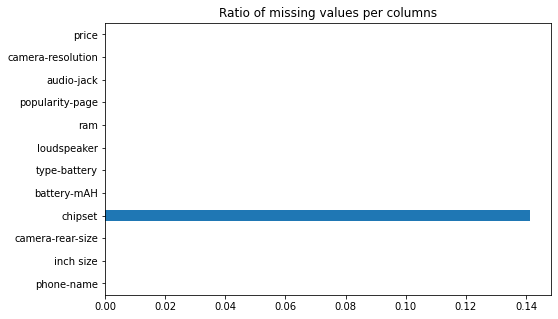

In [ ]:
'''Missing Value Chart'''
plt.figure(figsize=(8, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
print(df.isnull().values.sum()) #total missing values

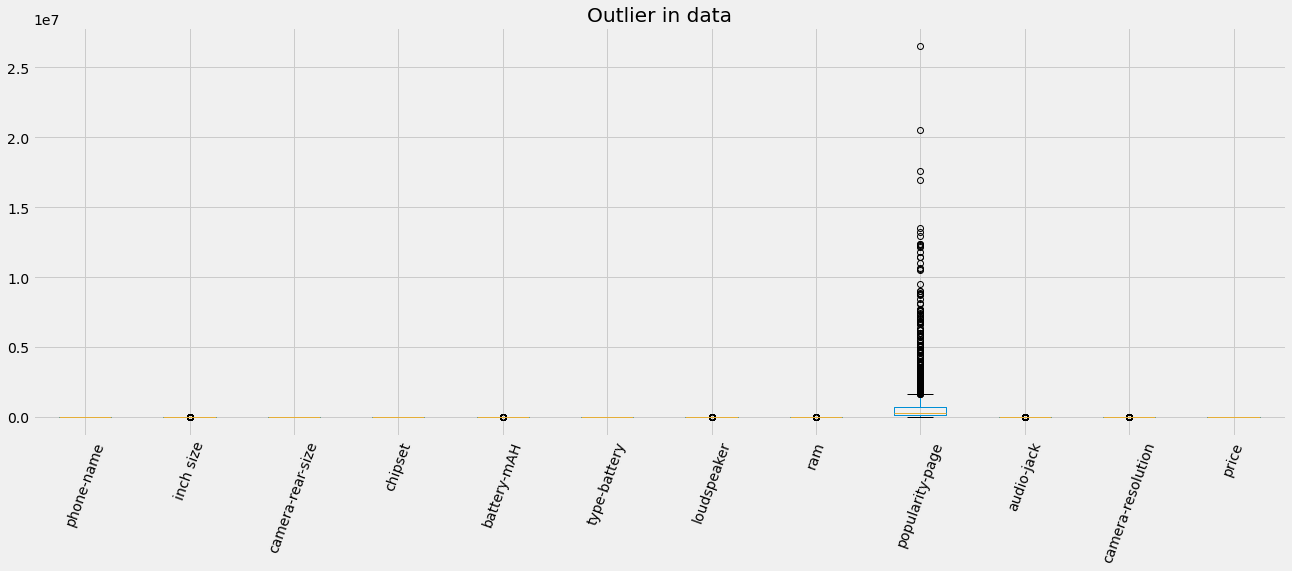

In [ ]:
#handling outlier
for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature] = pd.Categorical(df[feature]).codes

plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

In [ ]:
#membuat fungsi untuk handling outlier
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

#karena outlier ada pada popularity page maka yang termasuk outlier adalaha popularity page
outlier_list = ['popularity-page']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

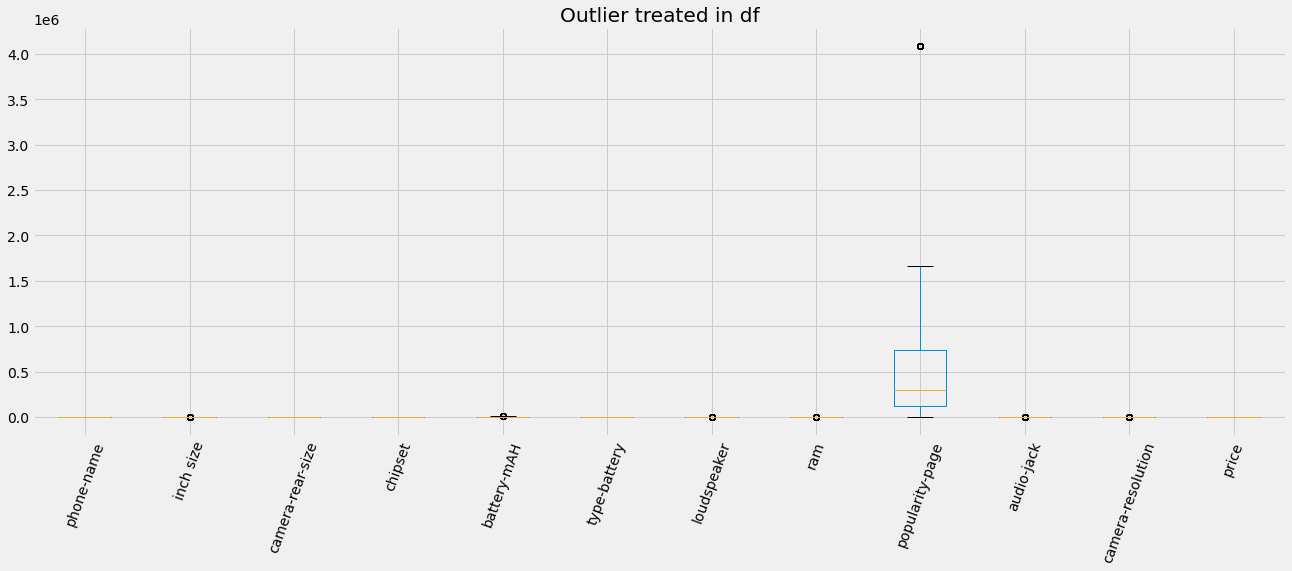

In [ ]:
#cek outlier
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

## Feature Selection

[Text(0, 0.5, 'phone-name'),
 Text(0, 1.5, 'inch size'),
 Text(0, 2.5, 'camera-rear-size'),
 Text(0, 3.5, 'chipset'),
 Text(0, 4.5, 'battery-mAH'),
 Text(0, 5.5, 'type-battery'),
 Text(0, 6.5, 'loudspeaker'),
 Text(0, 7.5, 'ram'),
 Text(0, 8.5, 'popularity-page'),
 Text(0, 9.5, 'audio-jack'),
 Text(0, 10.5, 'camera-resolution'),
 Text(0, 11.5, 'price')]

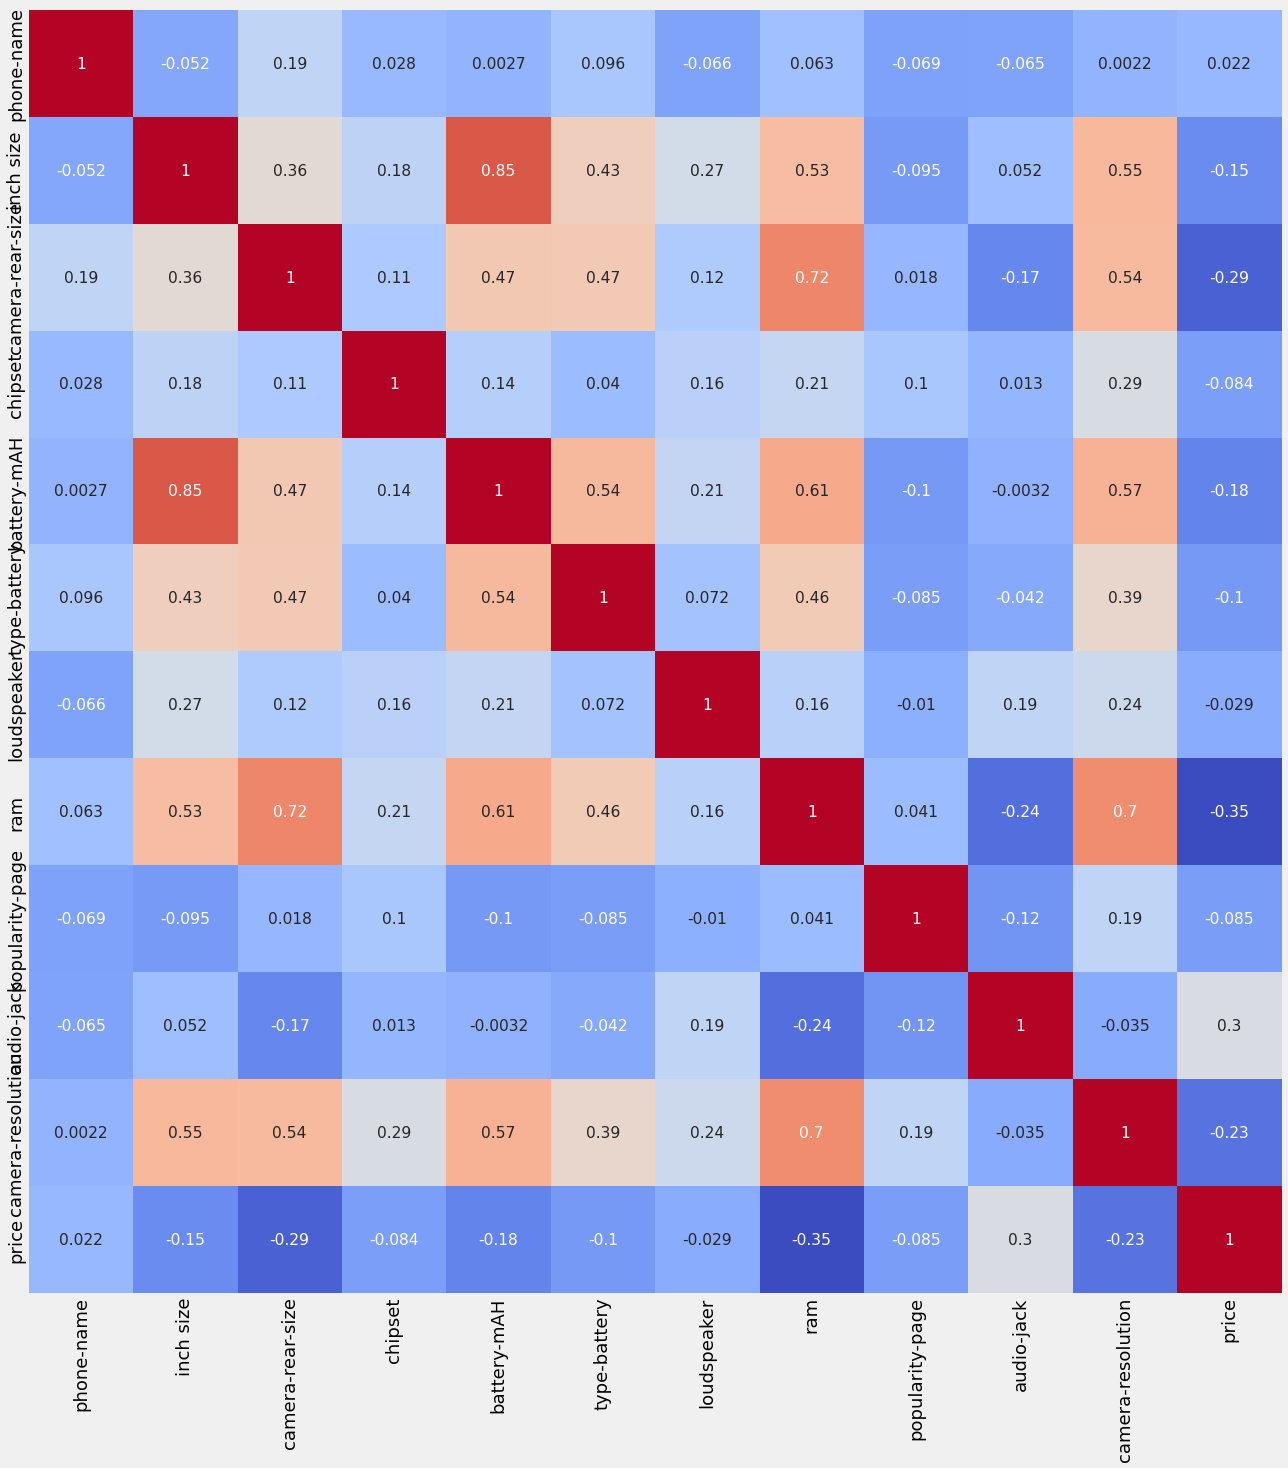

In [ ]:
#Correlation matrix check 
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( df.corr(), cmap='coolwarm', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [ ]:
#Melihat correlation terhadap price dari yang terbesar
df.corr()['price'].sort_values(ascending=False)

price                1.000000
audio-jack           0.298333
phone-name           0.022252
loudspeaker         -0.028838
chipset             -0.084160
popularity-page     -0.084544
type-battery        -0.100746
inch size           -0.149932
battery-mAH         -0.177596
camera-resolution   -0.230010
camera-rear-size    -0.287664
ram                 -0.353945
Name: price, dtype: float64

dari korelasi, dapat dilihat 6 variabel teratas yang memiliki korelasi dengan price terbesar yaitu ram,audio-jack, camera-rear-size, camera-resolution, battery-mAH, inch-size

## Modeling

In [ ]:
X=df[['ram','audio-jack','camera-resolution','battery-mAH','inch size']]
y=df['price']

In [ ]:
#numeric column
num_columns = X.select_dtypes(include='number').columns.tolist()
num_features = [] 
for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)

In [ ]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_features = []
for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)

In [ ]:
preprocess = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [])])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [ ]:
OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  price
0       0    648
1       1    648


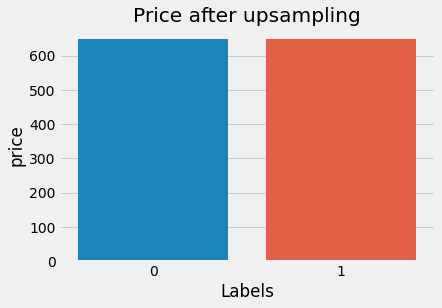

In [ ]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','price']
print(oversample_plot)
sns.barplot(x='Labels',y='price',data=oversample_plot);
plt.title('Price after upsampling');

### Random Forest

In [ ]:
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)
predictionforest = grid_obj.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

### SVM

In [ ]:


# Create a Support Vector Classifier
svc = SVC()

# Hyperparameter Optimization
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)
predictionforest = grid_obj.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

[[153  95]
 [ 79 198]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       248
           1       0.68      0.71      0.69       277

    accuracy                           0.67       525
   macro avg       0.67      0.67      0.67       525
weighted avg       0.67      0.67      0.67       525



### KNN

In [ ]:
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)
predictionforest = grid_obj.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

[[159  89]
 [ 96 181]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       248
           1       0.67      0.65      0.66       277

    accuracy                           0.65       525
   macro avg       0.65      0.65      0.65       525
weighted avg       0.65      0.65      0.65       525



### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_obj =GridSearchCV(estimator=dt, 
                           param_grid=parameters, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_obj = grid_obj.fit(X_train, y_train)

dt = grid_obj.best_estimator_
# Train the model using the training sets 
dt.fit(X_train,y_train)
predictionforest = grid_obj.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
[[153  95]
 [ 59 218]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       248
           1       0.70      0.79      0.74       277

    accuracy                           0.71       525
   macro avg       0.71      0.70      0.70       525
weighted avg       0.71      0.71      0.70       525



### Naive Bayes

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
bayes = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=bayes, 
                     param_grid=params_NB, 
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

predictionforest = grid_obj.best_estimator_.predict(Data_transformed)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[[ 12 236]
 [  1 276]]
              precision    recall  f1-score   support

           0       0.92      0.05      0.09       248
           1       0.54      1.00      0.70       277

    accuracy                           0.55       525
   macro avg       0.73      0.52      0.40       525
weighted avg       0.72      0.55      0.41       525

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:

classifier = Sequential()
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

53/53 [==============================] - 0s 825us/step - loss: 0.9304 - accuracy: 0.5562
[[ 12 236]
 [  1 276]]
              precision    recall  f1-score   support

           0       0.92      0.05      0.09       248
           1       0.54      1.00      0.70       277

    accuracy                           0.55       525
   macro avg       0.73      0.52      0.40       525
weighted avg       0.72      0.55      0.41       525



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=827397d5-817b-467c-ad01-9057bccfb512' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>